In [4]:
#require "jupyter.notebook" 

/Users/danghica/.opam/4.03.0/lib/bytes: added to search path
/Users/danghica/.opam/4.03.0/lib/base64: added to search path
/Users/danghica/.opam/4.03.0/lib/base64/base64.cma: loaded
/Users/danghica/.opam/4.03.0/lib/ocaml/compiler-libs: added to search path
/Users/danghica/.opam/4.03.0/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/Users/danghica/.opam/4.03.0/lib/easy-format: added to search path
/Users/danghica/.opam/4.03.0/lib/easy-format/easy_format.cma: loaded
/Users/danghica/.opam/4.03.0/lib/biniou: added to search path
/Users/danghica/.opam/4.03.0/lib/biniou/biniou.cma: loaded
/Users/danghica/.opam/4.03.0/lib/yojson: added to search path
/Users/danghica/.opam/4.03.0/lib/yojson/yojson.cma: loaded
/Users/danghica/.opam/4.03.0/lib/result: added to search path
/Users/danghica/.opam/4.03.0/lib/result/result.cma: loaded
/Users/danghica/.opam/4.03.0/lib/ppx_deriving: added to search path
/Users/danghica/.opam/4.03.0/lib/ppx_deriving/ppx_deriving_runtime.cma: loaded
/Users/danghica/.opa

# Sample Exam Answers
## 2017-2018

### Question 1 [40pts]

*Note:* 
* This question examines knowledge of lecture material. 
* The 10 sub-questions are selected from the slides, each from one week. 
* They require no problem solving skills. 
* Make your answer concise.
* The marker will give the benefit of the doubt.

Sample answers:

1. *What is a deterministic rewrite system?*  
    There is a unique sequence of applicable rewrites. 
    
2. *What is the value of the expression `x + (let x = x + 3 in x + x) + x`  ?*
```
= x + (x+3 + x+3) + x = 4 * x + 6
```
Note that the answer *undefined due to variable `x` being undefined* is also acceptable.

3. *Enumerate some of the advantages of pattern-matching versus if statements.*  
   Exhaustive case coverage, unreachable code coverage, better syntax (variable extraction).
   
4. *Write a non-tail-recursive OCaml function computing the maximum element of a list.*

In [5]:
let rec f = function 
| [x] -> x
| x :: xs -> max x (f xs)

File "[5]", line 1, characters 12-58:
Warning 8: this pattern-matching is not exhaustive.
Here is an example of a value that is not matched:
[]


val f : 'a list -> 'a = <fun>


In [6]:
(* Small test *)
f [1;2;3;2;1;7]

- : int = 7


`5`. *Write the same function as above but tail-recursively.* 

In [7]:
let rec f' m = function 
| [] -> m
| x :: xs -> f' (max m x) xs

val f' : 'a -> 'a list -> 'a = <fun>


In [8]:
(* Small test *)
f' 1 [1;2;3;2;1]

- : int = 3



`6`.  *Using the Curry-Howard isomorphism prove double-negation introduction by constructing the OCaml term of the appropriate type.*

In [9]:
type empty
let dni (a : 'a) (nota : 'a -> empty) = nota a

type empty


val dni : 'a -> ('a -> empty) -> empty = <fun>


*Obs:* For `'b = empty`. 

`7`. *Explain when and how quick-sort and merge-sort have different performance characteristics.*  
   When the input is already sorted quick-sort has poor performance due to the fact that the list is not split in two lists of approximately same length. 

`8`. *Define addition for Peano natural numbers.*

In [10]:
type nat = Zero | Suc of nat
let rec add m n = match m with 
| Zero -> n
| Suc m -> Suc (add m n)

type nat = Zero | Suc of nat


val add : nat -> nat -> nat = <fun>


`9`. *Define the type of binary trees in OCaml.*


In [11]:
type 'a binTree = Leaf of 'a | Node of 'a binTree * 'a binTree

type 'a binTree = Leaf of 'a | Node of 'a binTree * 'a binTree


*Obs:* Any type of binary tree would be acceptable. 

`10`. *Define the function map for lists.*

In [12]:
let rec map f = function
| [] -> []
| x :: xs -> (f x) :: (map f xs)

val map : ('a -> 'b) -> 'a list -> 'b list = <fun>


In [13]:
(* Small test *)
map ( (+) 1) [1;2;3;2;1]

- : int list = [2; 3; 4; 3; 2]



### Question 2 [30pts]

**Observations:**
* This question is a medium difficulty assignment (or very similar to assignment) question. 
* It is chosen at random from the current bank of assignment questions (possibly with small variation). 
* A moderate amount of problem-solving skill required. 
* The marker will give benefit of the doubt.
* Partial credit will be given generously. 
* Answering Q1 and Q2 perfectly, which is achievable, ensures at 1st.
* The actual exam will have an Appendix of allowable functions which you can assume and use without re-implementing them. It includes map, fold, mem, sort, etc. 
* If some function you may want to use, is not in the Appendix you need to provide the implementation. 
* Marking scheme:
  * Up to 10 pts : Partial solution or serious bugs
  * Up to 20 pts : Naive solution or minor bugs
  * Up to 30 pts : Well expressed efficient solution

**The question:** *One difference between a set and a list is that in a set each element occurs exactly once. Efficiently implement a setify function which returns the list of elements in a list, all occurring exactly once, in any order.* 

**Notes:** 
* We are going to use the often-discussed trick of sorting the list first. Sorting is an efficient operation which makes solving the problem easy. 
* I will assume `sort` is provided in the appendix. 

In [14]:
(* This helper function eliminates consecutive duplicates. *)
let rec remdup = function 
| [] -> []
| [x] -> [x]
| x :: x' :: xs when x = x' -> remdup (x' :: xs)
| x :: x' :: xs             -> x :: (remdup (x' :: xs))

val remdup : 'a list -> 'a list = <fun>


In [15]:
(* Small test *)
remdup [1;1;2;3;3;3;4;5]

- : int list = [1; 2; 3; 4; 5]


In [16]:
let setify xs = xs |> List.sort compare |> remdup

val setify : 'a list -> 'a list = <fun>


In [17]:
compare 10 10

- : int = 0


In [18]:
(* Small test *)
setify [1;2;3;4;5;4;3;2;3;4;3;2;1]

- : int list = [1; 2; 3; 4; 5]


### Question 3 [30pts]

We propose the following representation of geometric paths:
* The symbol `I` represents a horizongal line segment
* The symbol `X` represents two crossing line segments
* The symbol `C` represents a half-loop
* The `-*` operation represents the horizontal flipping of a path diagram
* The `-.-` operation represents the horizontal gluing of two path diagrams so that the loose ends on the left match the loose ends on the right. In order for this operation to be well-defined the number of loose ends on both ends need to be the same
* The `-x-` operation represents the vertical stacking of two diagrams, extending the loose ends so they line up. This operation is always well defined. 

Examples:

* A circle is represented as `C.C*`
* A horizontal figure-8 is represented as `C.X.C*`
* A horizontal oval is reprezented as `C.(IxI).C*`
* Note that X*=X
* An "open knot" path like below is described by `(CxI).(IxX).(XxI).(IxX).(C*xI)`. 

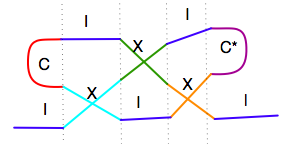

- : Jupyter_notebook.display_id = <abstr>


In [19]:
Jupyter_notebook.display_file ~base64:true "image/png" "path.png"

**Task:** The OCaml representation of such a path is a tree with leaves `C, I, X` and nodes for the operations `(-x-, -.-, -*)`. Your task is to write an OCaml function which returns true if and only if the argument represents a valid closed path.  

For example a circle, an oval, or a figure-8 are all closed paths. But a knot is an open path. Also, an expression such as `C.I.C*` is not an open path because it is ill-formed, since `C` has two loose ends on the right and I only one. 

**Notes:**
* Question 3 is of *exceptional* difficulty.
* Marks over 70% should denote exceptional ability and achievement. 
* It requires advanced problem solving and implementation skills. 
* Partial marks will be awarded reluctantly. 

In [20]:
type path = C | I | X | Par of path * path | Seq of path * path | Neg of path 

type path = C | I | X | Par of path * path | Seq of path * path | Neg of path


In [21]:
(* Auxiliary function: Extend a list of integers with a new value. 
The function f has been defined above, takes the max of a list. *)
let f xs = List.fold_left max (List.hd xs) xs

(* 
Convert (evaluate) the path expression into a relation-like graph definition (source, target) list
We use the following tuple to represent a path:
    input nodes, output nodes, edges, nodes
Note that in order to facilitate efficient loop checking we also put the smaller node first in any edge.
*)

let rec graph_of_path = function 
| C, nodes -> let n1 = f nodes + 1 in 
              let n2 = f nodes + 2 in 
              (* The C path has no inputs, two outputs, connected *)
              [], [n1; n2], [(n1, n2)], (n1 :: n2 :: nodes)
| I, nodes -> let n1 = f nodes + 1 in 
              let n2 = f nodes + 2 in 
              (* The I path has an input, an output, connected *)
              [n1], [n2], [(n1, n2)], (n1 :: n2 :: nodes)
| X, nodes -> let n1 = f nodes + 1 in 
              let n2 = f nodes + 2 in 
              let n3 = f nodes + 3 in 
              let n4 = f nodes + 4 in 
              (* The X path has two inputs, two outputs, cross-connected *)
              [n1; n2], [n3; n4], [(n1, n4); (n2, n3)], (n1 :: n2 :: n3 :: n4 :: nodes)
| Par (p1, p2), nodes -> 
              (* First we evaluate the sub-paths to graphs, to be composed *)
              let (i1, o1, r1, nodes1) = graph_of_path (p1, nodes) in
              let (i2, o2, r2, nodes2) = graph_of_path (p2, nodes1) in 
              (* The two interfaces are concatenated and we take the union of the relations *)
              i1 @ i2, o1 @ o2, r1 @ r2, nodes2
| Seq (p1, p2), nodes -> 
              (* First we evaluate the sub-paths to graphs, to be composed *)
              let (i1, o1, r1, nodes1) = graph_of_path (p1, nodes) in
              let (i2, o2, r2, nodes2) = graph_of_path (p2, nodes1) in 
              (* We take the first input, the second output, the union of the relations plus new edges 
              from the first output to the second input, sorted so that the first element is smaller *)
              i1, o2, r1 @ r2 @ (List.combine o1 i2 |> List.map (fun (x, y) -> min x y, max x y)), nodes2
| Neg p, nodes -> 
              (* First we evaluate the sub-path then swap interfaces *)
              let (i, o, r, nodes1) = graph_of_path (p, nodes) in
              o, i, r, nodes1

val f : 'a list -> 'a = <fun>


val graph_of_path :
  path * int list -> int list * int list * (int * int) list * int list =
  <fun>


In [22]:
(* Small test *)
let p = 
    let p0 = Par (I, I) in 
    let p1 = Seq (C, p0) in 
    Seq (p1, Neg C) 
    
let g = graph_of_path (p, [0])

val p : path = Seq (Seq (C, Par (I, I)), Neg C)


val g : int list * int list * (int * int) list * int list =
  ([], [], [(1, 2); (3, 4); (5, 6); (1, 3); (2, 5); (7, 8); (4, 7); (6, 8)],
   [7; 8; 5; 6; 3; 4; 1; 2; 0])


In [23]:
(* 
Auxiliary function to check efficiently whether a set of edges defines a loop.
We assume the set of edges is sorted by the first node. 
Since the edges are sorted, and the nodes in each edges are sorted, we can just remove from the top. 
*)
let rec isloop = function 
| [] -> true
| [(x, y)] -> x = y 
| (x, y) :: (x', y') :: es when x = x' -> isloop ((min y y', max y y') :: es)
| _ -> false

val isloop : ('a * 'a) list -> bool = <fun>


In [24]:
(* Small test *)
let _, _, es, _ = g in es |> List.sort compare |> isloop

- : bool = true


In [25]:
(*****************
 Overall solution 
******************)
let check_path p = 
    let _, _, es, _ = graph_of_path (p, [0]) in 
    es |> List.sort compare |> isloop

val check_path : path -> bool = <fun>


In [26]:
(* Small test *)
check_path p

- : bool = true


In [27]:
(* A failed loop test *)
check_path (Seq (I, Seq (I, I)))

- : bool = false


In [28]:
(* An ill-formed graph test *)
check_path (Seq (C, C))

error: runtime_error

In [29]:
"Good luck!"

- : string = "Good luck!"
